In [5]:
ig_id = '*****'
ig_pass = '*****'
login_url = 'https://www.instagram.com/'

In [6]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(executable_path ='C:/Users/Hope/Desktop/chromedriver')
driver.get(login_url)

In [7]:
import re
def loginInsta(ig_id,ig_pass):
    usr_name = driver.find_element_by_name('username')
    usr_name.send_keys(ig_id )
    usr_pass = driver.find_element_by_name('password')
    usr_pass.send_keys(ig_pass)
    usr_pass.submit()
    
def realCount(count):
    toLong = {
        ''  : 1,
        'k' : 1000,
        'm' : 100000,
        'b' : 1000000000
    }
    count = count.replace(',','')  
    count = count.strip()
    main = float(re.sub(r'[A-z]','',count))
    sub = re.sub(r'[^a-z]','',count)
         
    return int(main*int(toLong[sub]))

def removeComma(count):
    count = int(re.sub(r'[A-z]','',count))
    #count = int(count.replace(',',''))
    return count

In [8]:
loginInsta(ig_id,ig_pass)

In [9]:
search = "Gaming"

In [10]:
def postDate(postedOn):
    today = 0
    before = 0
    if 'HOURS' in postedOn:
        today = 1
    if 'DAY' in postedOn:
        before = int(re.sub(r'[A-Z,a-z]','',postedOn))        
    if before<4 or today:
        return True
    return False
postDate('4 HOURS AGO')

True

In [99]:
import time
ig_post = driver.find_elements_by_class_name('_9AhH0')
counts = 0
cc = True
i = 0
while 1:
    ig_post[i].click()
    ig_postDate = driver.find_elements_by_class_name('c-Yi7')
    if(postDate(ig_postDate[0].text)):
        counts += 1
    else:
        driver.back()
        break
    time.sleep(1)
    driver.back()
    i+=1
return post_counts

5

In [100]:
for i in accounts[:10]:
    print(i)

foodtalkindia
dilsefoodie
monkey_learning
foodie_kulsum
the.food_cult
delhi_streets_food
food
ahmedabad__food
food_lunatic
foodie_incarnate


# Account Open and Retrive Info

In [20]:
from selenium.webdriver.support.ui import WebDriverWait
import time

In [21]:
def openAccount(driver,search):
    driver.get(login_url)
    # Searching for Search Bar and Sending Keys
    in_search = driver.find_element_by_class_name('XTCLo')
    in_search.clear()
    in_search.send_keys(search)

    # Wait to Load results
    driver.implicitly_wait(10)

    search_results = driver.find_elements_by_xpath("//div[contains(@class, '_7UhW9') and contains(@class, 'xLCgt') and contains(@class, 'qyrsm') and contains(@class, 'KV-D4') ]")
    if search_results[0].text == 'Getting Started':
        search_results = search_results[1:]

    time.sleep(1)
    search_results = driver.find_elements_by_xpath("//div[contains(@class, '_7UhW9') and contains(@class, 'xLCgt') and contains(@class, 'qyrsm') and contains(@class, 'KV-D4') ]")
    search_results[1].click()
    #return 1

In [22]:
def igName(driver):
    try:
        ig_name = driver.find_element_by_tag_name('h2')
        ig_name = ig_name.text
    except NoSuchElementException:
        ig_name = driver.current_url.split('/')[-2]
    return ig_name

def igStats(driver):
    ig_stats = driver.find_elements_by_class_name('Y8-fY')
    pfs = []
    for i in ig_stats:
        pfs.append(realCount(i.text.split()[0]))
    return pfs

def igDesc(driver):
    ig_desc = driver.find_element_by_xpath('//*[@class="-vDIg"]/span')
    ig_desc = ig_desc.text
    return ig_desc

In [23]:
from datetime import date
from datetime import datetime, timedelta
from selenium.common.exceptions import NoSuchElementException
def postUrl(driver):
    return driver.current_url

def postCaption(driver):
    try:
        caption = driver.find_element_by_xpath('//*[@class="C4VMK"]/span').text
    except NoSuchElementException:
        caption = ""
    return caption

def postLikes(driver):
    try:
        count = driver.find_element_by_class_name('Nm9Fw').text
    except NoSuchElementException:
        count = '0'   
    return realCount(count.split()[0])

def postedOn(driver):
    ig_postDate = driver.find_element_by_class_name('c-Yi7')
    return ig_postDate.text


def postDate(postedOn):
    today = 0
    before = 0
    postdate = ''
    if 'HOUR' in postedOn or 'MINUTES' in postedOn:
        today = 1
        postedOn = str(date.today())
    elif 'DAY' in postedOn:
        before = int(re.sub(r'[A-Z,a-z]','',postedOn))         
        N_DAYS_AGO = before
        today = datetime.now()  
        n_days_ago = today - timedelta(days=N_DAYS_AGO)
        postedOn = str(n_days_ago).split(' ')[0]
    return postedOn



def scrollUp(driver):
    driver.execute_script('window.scrollTo(0,0);')
    
    
def scrollDown(driver):
    cur_height = driver.execute_script('return document.body.scrollHeight;')
    driver.execute_script('window.scrollTo(0,arguments[0]);',cur_height)
    new_height = driver.execute_script('return document.body.scrollHeight;')
    cur_height = new_height



def loadPosts(driver,npost):
    ig_post = postsOnPage(driver)    
    while ig_post<=npost:
        scrollDown(driver)
        ig_post = postsOnPage(driver) 
    scrollUp(driver)

    
def postsOnPage(driver):
    ig_post = driver.find_elements_by_class_name('_9AhH0')
    return len(ig_post)
    
    
def getPostDetails(driver,npost,ig_name):
    #driver.get("https://www.instagram.com/"+ig_name)
    time.sleep(1)
    posts = igStats(driver)[0]
    if (npost>posts):
        npost = posts
    loadPosts(driver,npost)
    post_details = []    
    ig_post = driver.find_elements_by_class_name('_9AhH0')

    for i in range(npost):
        ig_post[i].click()
        time.sleep(1.5)
        post_details.append({
            'post_Url' : postUrl(driver),
            'post_Caption' : postCaption(driver),
            'post_Likes' : postLikes(driver),
            'post_Date' : postDate(postedOn(driver))
        })
        driver.back()
    return post_details

In [24]:
def getAccountDetails(driver,accName,npost):
    driver.get("https://www.instagram.com/"+accName)
    post_details = getPostDetails(driver,npost,accName)
    
    name = igName(driver)    
    ig_account  = {
        'ig_Name' : name,
        'ig_Post' : igStats(driver)[0],    
        'ig_follower' : igStats(driver)[1],
        'ig_following' : igStats(driver)[2],
        'ig_Desc' : igDesc(driver),
        'post_details' : post_details 
    }
    return ig_account

In [109]:
post_details

[{'post_Url': 'https://www.instagram.com/p/CVele4uhnMl/',
  'post_Caption': '20 Inch Maharaja Kulcha of Vadodara😱😱\n.\nWatch the full video on my YouTube channel. Link is in my bio🤗🤗\n.\n#Foodieincarnate #Reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #kulcha #streetfood #vadodara #punjabi',
  'post_Likes': 7652,
  'post_Date': '2021-10-26'},
 {'post_Url': 'https://www.instagram.com/p/CVcUZd4hZt2/',
  'post_Caption': '"Disney + Hotstar subscription free, that too during the match season! Unbelievable isn’t it? Well, you better believe it. You will get not just a free subscription but will also get Rs40 cashback. All you need to do it, download Airtel thanks app and switch to Rewards 123plus. It’s that simple. Don’t wait around now, go ahead and download Airtel thanks app and get such benefits and more. Enjoy it all!\n.\n.\n.\n@airtelpaymentsbank #foodieincarnate #airtelpaymentsbank #hotstar #t20worldcup #indvspak #cricketworldcup #t20 #cricketfever',
  'post_Likes': 0,
  'post_D

# QUESTION 1

Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
Now Find the number of posts these handles have done in the previous 3 days.
Depict this information using a suitable graph.

In [26]:
search = 'Travel'
# Searching for Search Bar and Sending Keys
in_search = driver.find_element_by_class_name('XTCLo')
in_search.clear()
in_search.send_keys(search)

# Wait to Load results
driver.implicitly_wait(15)

# Finding all loaded options 
search_results = driver.find_elements_by_xpath("//div[contains(@class, '_7UhW9') and contains(@class, 'xLCgt') and contains(@class, 'qyrsm') and contains(@class, 'KV-D4') ]")

# Removing Getting Started from search results
if search_results[0].text == 'Getting Started':
    search_results = search_results[1:]
accounts = []
# Removing # Hash Tags and printing results
for i in search_results:
    if i.text[0]  != '#':
        accounts.append(i.text)
        print(i.text)

bestvacations
indiatravellife
travelrealindia
poojan_tours_travels
travel._.india
thetravelingdesi
travel
nature___.beauty
sumittoursandtravels
Nilkanth Travels
traveltriangle
travel.our.india
bruisedpassports
travelandleisureindia
traveljunky7
indiangirltrip
ajaymodi.travels
ladhak_diary
travelgirlsindia
travlustar
travelxptv
mannisavibe
ishangoyaltravel
shivoryx
travel_with_chandni
roadtrip.diary
surat_all_travels_1005
travelandleisure
code_travel_repeat
the_lost_travellers
_travel.mountains
travelling__moments
imahimaagarwal
Go 360 - Kar Travel Befikar
travelinggirl_india
vama_shah22
luxury_travel_life._
365thetravelcafe
foodntraveljournal
dikshitmundra
official_photographers_hub
traveltours.in
travel_with_a_job
manali_tour_and_travels
M.m Travel
nikita.butalia
Snowflakes Academy of Travel


In [28]:
npost = 10
for i in accounts[1:10]:
    print(i)
    accounts_details.append(getAccountDetails(driver,i,10))
accounts_details

indiatravellife
travelrealindia
poojan_tours_travels
travel._.india
thetravelingdesi
travel
nature___.beauty
sumittoursandtravels
Nilkanth Travels


[{'ig_Name': 'indiatravellife',
  'ig_Post': 1660,
  'ig_follower': 568000,
  'ig_following': 34,
  'ig_Desc': 'Join the Virtual Journey 📺\nBackup - @indiatravellife2.0\nTravel | Lifestyle | Photography 📸\nUse #indiatravellife\n📧 indiatravellifestyle@gmail.com',
  'post_details': [{'post_Url': 'https://www.instagram.com/p/CVzcUuhoY86/',
    'post_Caption': 'Tag your friends 😍💚\n🔸\nVideo : @sshruti_gavhane\n🔸\nFollow us : @indiatravellife\n🔸\nLocation : 📍Korigad Fort Trek, Lonavala, Pune, Maharashtra, India\n🔸\nCheckout our Food Page : @indiafoodlife\n🔸\nUse #indiatravellife for a chance to get featured ✨\n🔸\nNo Copyright infringement intended\nDm/Email us for Credits or Removal 🌸\n🔸\n#incredibleindia #everydayindia #travelrealindia #indiatravelgram #indiatravel #everydayindia #storiesofindia #streetsofindia #travelindia #lonelyplanetindia #travelphotography #tripotocommunity #travelgram #yourshot_india #mypixeldiary #indiapictures #beautifuldestinations #indianphotographers #indianphot

In [29]:
len(accounts_details)

9

In [30]:
import pandas as pd
df = pd.DataFrame(accounts_details)

In [31]:
#accounts_details
import pickle
filename = 'Travel_accounts_details'
outfile = open(filename,'wb')
pickle.dump(accounts_details,outfile)
outfile.close()

In [32]:
df.head()

,ig_Name,ig_Post,ig_follower,ig_following,ig_Desc,post_details
0,indiatravellife,1660,568000,34,Join the Virtual Journey 📺\nBackup - @indiatra...,[{'post_Url': 'https://www.instagram.com/p/CVz...
1,travelrealindia,6095,681000,235,🔹India's Largest Travel Influencer community\n...,[{'post_Url': 'https://www.instagram.com/p/CVz...
2,poojan_tours_travels,191,6133,2,Travel is the only thing you buy that makes yo...,[{'post_Url': 'https://www.instagram.com/p/CVt...
3,travel._.india,799,35300,1953,🌈Visually Vibrant Vibes of India 🇮🇳\n❣️ People...,[{'post_Url': 'https://www.instagram.com/p/CVz...
4,thetravelingdesi,115,180000,108,IT Entrepreneur and Indian Travel Vlogger,[{'post_Url': 'https://www.instagram.com/p/CVc...


In [33]:
df.sort_values(['ig_follower'], ascending=[False],inplace=True)

In [34]:
df

,ig_Name,ig_Post,ig_follower,ig_following,ig_Desc,post_details
1,travelrealindia,6095,681000,235,🔹India's Largest Travel Influencer community\n...,[{'post_Url': 'https://www.instagram.com/p/CVz...
0,indiatravellife,1660,568000,34,Join the Virtual Journey 📺\nBackup - @indiatra...,[{'post_Url': 'https://www.instagram.com/p/CVz...
5,travel,875,448000,16,Photos & videos from around the world 📸🌎\nWe c...,[{'post_Url': 'https://www.instagram.com/p/CVO...
6,nature___.beauty,523,403000,201,𝙄'𝙢 𝙤𝙣 𝙢𝙮 𝙟𝙤𝙪𝙧𝙣𝙚𝙮. 𝙟𝙤𝙞𝙣 𝙢𝙚 𝙗𝙮 𝙛𝙤𝙡𝙡𝙤𝙬𝙞𝙣𝙜 𝙖𝙡𝙤𝙣𝙜\...,[{'post_Url': 'https://www.instagram.com/p/CVu...
4,thetravelingdesi,115,180000,108,IT Entrepreneur and Indian Travel Vlogger,[{'post_Url': 'https://www.instagram.com/p/CVc...
3,travel._.india,799,35300,1953,🌈Visually Vibrant Vibes of India 🇮🇳\n❣️ People...,[{'post_Url': 'https://www.instagram.com/p/CVz...
2,poojan_tours_travels,191,6133,2,Travel is the only thing you buy that makes yo...,[{'post_Url': 'https://www.instagram.com/p/CVt...
7,sumittoursandtravels,52,3455,49,M. 90664 90663\nLeisure🏖️ | Culture | Nature🏞️...,[{'post_Url': 'https://www.instagram.com/p/CVN...
8,nilkanthtravels,12,625,391,Travel ExpRt\nTrIP PLannEr★\nProvide BEST RatE...,[{'post_Url': 'https://www.instagram.com/p/BJ9...


In [36]:
top_acc = df.iloc[0:5]

In [37]:
top_acc

,ig_Name,ig_Post,ig_follower,ig_following,ig_Desc,post_details
1,travelrealindia,6095,681000,235,🔹India's Largest Travel Influencer community\n...,[{'post_Url': 'https://www.instagram.com/p/CVz...
0,indiatravellife,1660,568000,34,Join the Virtual Journey 📺\nBackup - @indiatra...,[{'post_Url': 'https://www.instagram.com/p/CVz...
5,travel,875,448000,16,Photos & videos from around the world 📸🌎\nWe c...,[{'post_Url': 'https://www.instagram.com/p/CVO...
6,nature___.beauty,523,403000,201,𝙄'𝙢 𝙤𝙣 𝙢𝙮 𝙟𝙤𝙪𝙧𝙣𝙚𝙮. 𝙟𝙤𝙞𝙣 𝙢𝙚 𝙗𝙮 𝙛𝙤𝙡𝙡𝙤𝙬𝙞𝙣𝙜 𝙖𝙡𝙤𝙣𝙜\...,[{'post_Url': 'https://www.instagram.com/p/CVu...
4,thetravelingdesi,115,180000,108,IT Entrepreneur and Indian Travel Vlogger,[{'post_Url': 'https://www.instagram.com/p/CVc...


# Today's Date 2021-11-03
post from 3 Days Back

In [51]:
counts = {}
import re
#re.split('; |, |\*|\n',day)
for x in range(5):
    count = 0
    for i in top_acc.iloc[x].post_details:        
        day  = re.sub(r'[A-z]','',i['post_Date'])
        #day = day.strip().split('-')
        day = re.split('-| ',day)
        if int(day[-1])<=3:
            count += 1
    counts[top_acc.iloc[x].ig_Name] = count
    #print(top_foodie.iloc[x].ig_Name,'\t' ,count)
print(counts)

{'travelrealindia': 6, 'indiatravellife': 6, 'travel': 0, 'nature___.beauty': 4, 'thetravelingdesi': 2}


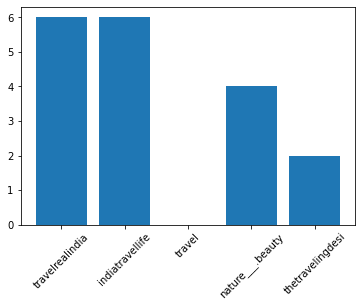

In [52]:
import matplotlib.pyplot as plt
x = counts.keys()
y = counts.values()
plt.xticks(rotation=45)
plt.bar(x,y)
plt.show()

# QUESTION 2

## Calculate the frequency of each word.

Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
Create a csv file with two columns : the word and its frequency
Now, find the hashtags that were most popular among these bloggers
Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [55]:
all_string = ''

for x in range(5):
    count = 0
    for i in top_acc.iloc[x].post_details:        
        all_string += i['post_Caption']

In [56]:
top_acc.iloc[2].post_details[4]['post_Caption']

'Admiring the sunset from below the water. 😍😍 This amazing sunset is from Mullaloo Beach, Australia 🇦🇺 by @jadejemma\n.\n.\n.\n.\n.\n.\n.\n#earthpix #sunset #mullaloo #mullaloobeach #australia'

In [57]:
all_string = all_string.replace('\n',' ')
all_string

"📍Sissu, Himachal Pradesh  Traveller :- @thesunshineladki  This is Sissu in fall time and you will get this view in October.  Did you experience fall and how much you like it ?  #autumn #fall #sissu #manali #roadtrip #ride #travelrealindia #portrait #portraitphotography #wanderlust #traveldiaries #travelindia #_soi #indiaclicks #lonelyplanetindia #travelgram #mountains #himachal #HimalayasStatue Of Unity \U0001f929 📸 by @vasco_di_gama_ . Tag Us Or Use Our Hashtag For Feature. . Do give Your review on this Picture with tagging the Photographer in comment section 🙌 . Follow : @travelrealindia . #oph #TravelRealIndia #india #indiatravelgram #indiatravel #everydayindia #storiesofindia #streetsofindia #travelindia #lonelyplanetindia #travelphotography #tripotocommunity #travelgram #yourshot_india #mypixeldiary #indiapictures #beautifuldestinations #indianphotographers #indianphotography #indiaclicks #india_undiscovered #india_everyday #coloursofindia #asiatravel #indiantravellerUnseen Megha

In [58]:
import numpy as np
all_string = all_string.replace('.','')
npStr = np.array(all_string.strip().split(' ')) 

In [59]:
npStr 

array(['📍Sissu,', 'Himachal', 'Pradesh', ..., 'chat', 'with', 'followers'],
      dtype='<U40')

In [60]:
unique, counts = np.unique(npStr, return_counts=True)

In [61]:
captions = pd.DataFrame({'words' : unique,'counts':counts})
captions.sort_values(['counts'],ascending=[False],inplace=True)

In [62]:
captions

,words,counts
0,,70
763,🔸,63
645,the,48
172,:,44
472,for,25
...,...,...
113,#portrait,1
1,#,1
388,answer,1
111,#peacefulhimachal,1


In [63]:
captions.to_csv('Word_Frequency_Travel.csv')

## Calculating Hashtags

In [64]:
hashtags = []
for i in all_string.split(' '):
    if '#' in i:
        hashtags.append(i)

In [65]:
unique, counts = np.unique(hashtags, return_counts=True)
hashtags = pd.DataFrame({'hashtag':unique,'counts':counts})
hashtags.sort_values(['counts'],ascending=[False],inplace=True)
topH = hashtags[:5]

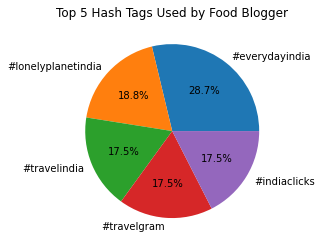

In [66]:
x = topH['hashtag']
y = topH['counts']
plt.pie(y,labels = x, autopct='%1.1f%%')
plt.title('Top 5 Hash Tags Used by Food Blogger')
plt.show()

# QUESTION 3
## Calculate average followers : likes ratio for the obtained handles.
### Followers : Likes ratio

In [69]:
followers = 0
likes=[]
acc =[]
for x in range(5):
    count = 0
    for i in top_acc.iloc[x].post_details:        
        count += i['post_Likes']
    print((count/10))
    likes.append(count/10)
    acc.append(top_acc.iloc[x].ig_Name)
    followers += top_acc.iloc[x].ig_follower

7564.2
4192.3
6223.1
1544.4
29480.0


In [70]:
avg_followers = followers/5

In [71]:
y=[]
for i in likes:
    y.append(avg_followers/i)
    #print(avg_followers/i)

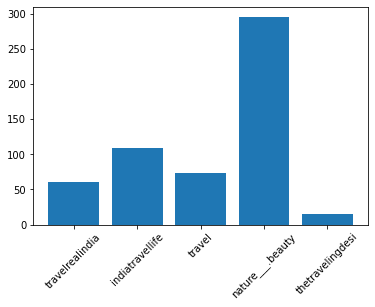

In [72]:
x = acc 
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()